# Exploration of services (electricity, natural gas and water) and weather data 

#### Key points
1. Trend through time (year, month, week, day, hour)
2. Minimum and maximum of consumption per service
3. Correlations between variables:
      - Consumption vs. time of year
      - Consumptions vs. consumptions
      - Consumptions vs. weather 

### 1. Consumption Data Analysis

In [49]:
# Import libraries for plotting, reading and wrangling data
library(ggplot2)
library(cowplot)
library(readr)
library(dplyr)

#### a) Electricity Consumption

In [104]:
# Read hourly electricity consumption data in csv file
ElecHourDF      <- read_csv("../../curated/electricity/gold_hourly_electricity.csv",    show_col_types = FALSE)
# Read daily electricity consumption data in csv file
ElecDayDF       <- read_csv("../../curated/electricity/gold_daily_electricity.csv",     show_col_types = FALSE)
# Read monthly electricity consumption data in csv file
ElecMonthDF     <- read_csv("../../curated/electricity/gold_monthly_electricity.csv",   show_col_types = FALSE)

In [110]:
# Define average consumption and outliers
avg_consumption <- mean(ElecHourDF$consumption)
ElecHourDF <- mutate(ElecHourDF, isOutlier = consumption > quantile(consumption, 0.95))

In [165]:
# Transformation of 'ElecHourDF' for visualization purposes
ElecDayHourWeekOneDF <- ElecHourDF %>%
    filter(year == 2012, month == 7, day <= 7) %>%
    mutate(
        time = format(strptime(hour, format="%H"), format = "%H:00"),
        date_time = paste0(date, " ", time),
        unix_ts = as.numeric(as.POSIXct(date_time)),
        instant = (unix_ts - min(unix_ts)) / (24 * 3600)
    ) %>%
    select(-c(time, date_time, unix_ts))

ElecDayHourWeekTwoDF <- ElecHourDF %>%
    filter(year == 2012, month == 7, day > 7 & day <= 14) %>%
    mutate(
        time = format(strptime(hour, format="%H"), format = "%H:00"),
        date_time = paste0(date, " ", time),
        unix_ts = as.numeric(as.POSIXct(date_time)),
        instant = (unix_ts - min(unix_ts)) / (24 * 3600)
    ) %>%
    select(-c(time, date_time, unix_ts))

ElecDayHourWeekThreeDF <- ElecHourDF %>%
    filter(year == 2012, month == 7, day > 14 & day <= 21) %>%
    mutate(
        time = format(strptime(hour, format="%H"), format = "%H:00"),
        date_time = paste0(date, " ", time),
        unix_ts = as.numeric(as.POSIXct(date_time)),
        instant = (unix_ts - min(unix_ts)) / (24 * 3600)
    ) %>%
    select(-c(time, date_time, unix_ts))

ElecDayHourWeekFourDF <- ElecHourDF %>%
    filter(year == 2012, month == 7, day > 21 & day <= 28) %>%
    mutate(
        time = format(strptime(hour, format="%H"), format = "%H:00"),
        date_time = paste0(date, " ", time),
        unix_ts = as.numeric(as.POSIXct(date_time)),
        instant = (unix_ts - min(unix_ts)) / (24 * 3600)
    ) %>%
    select(-c(time, date_time, unix_ts))

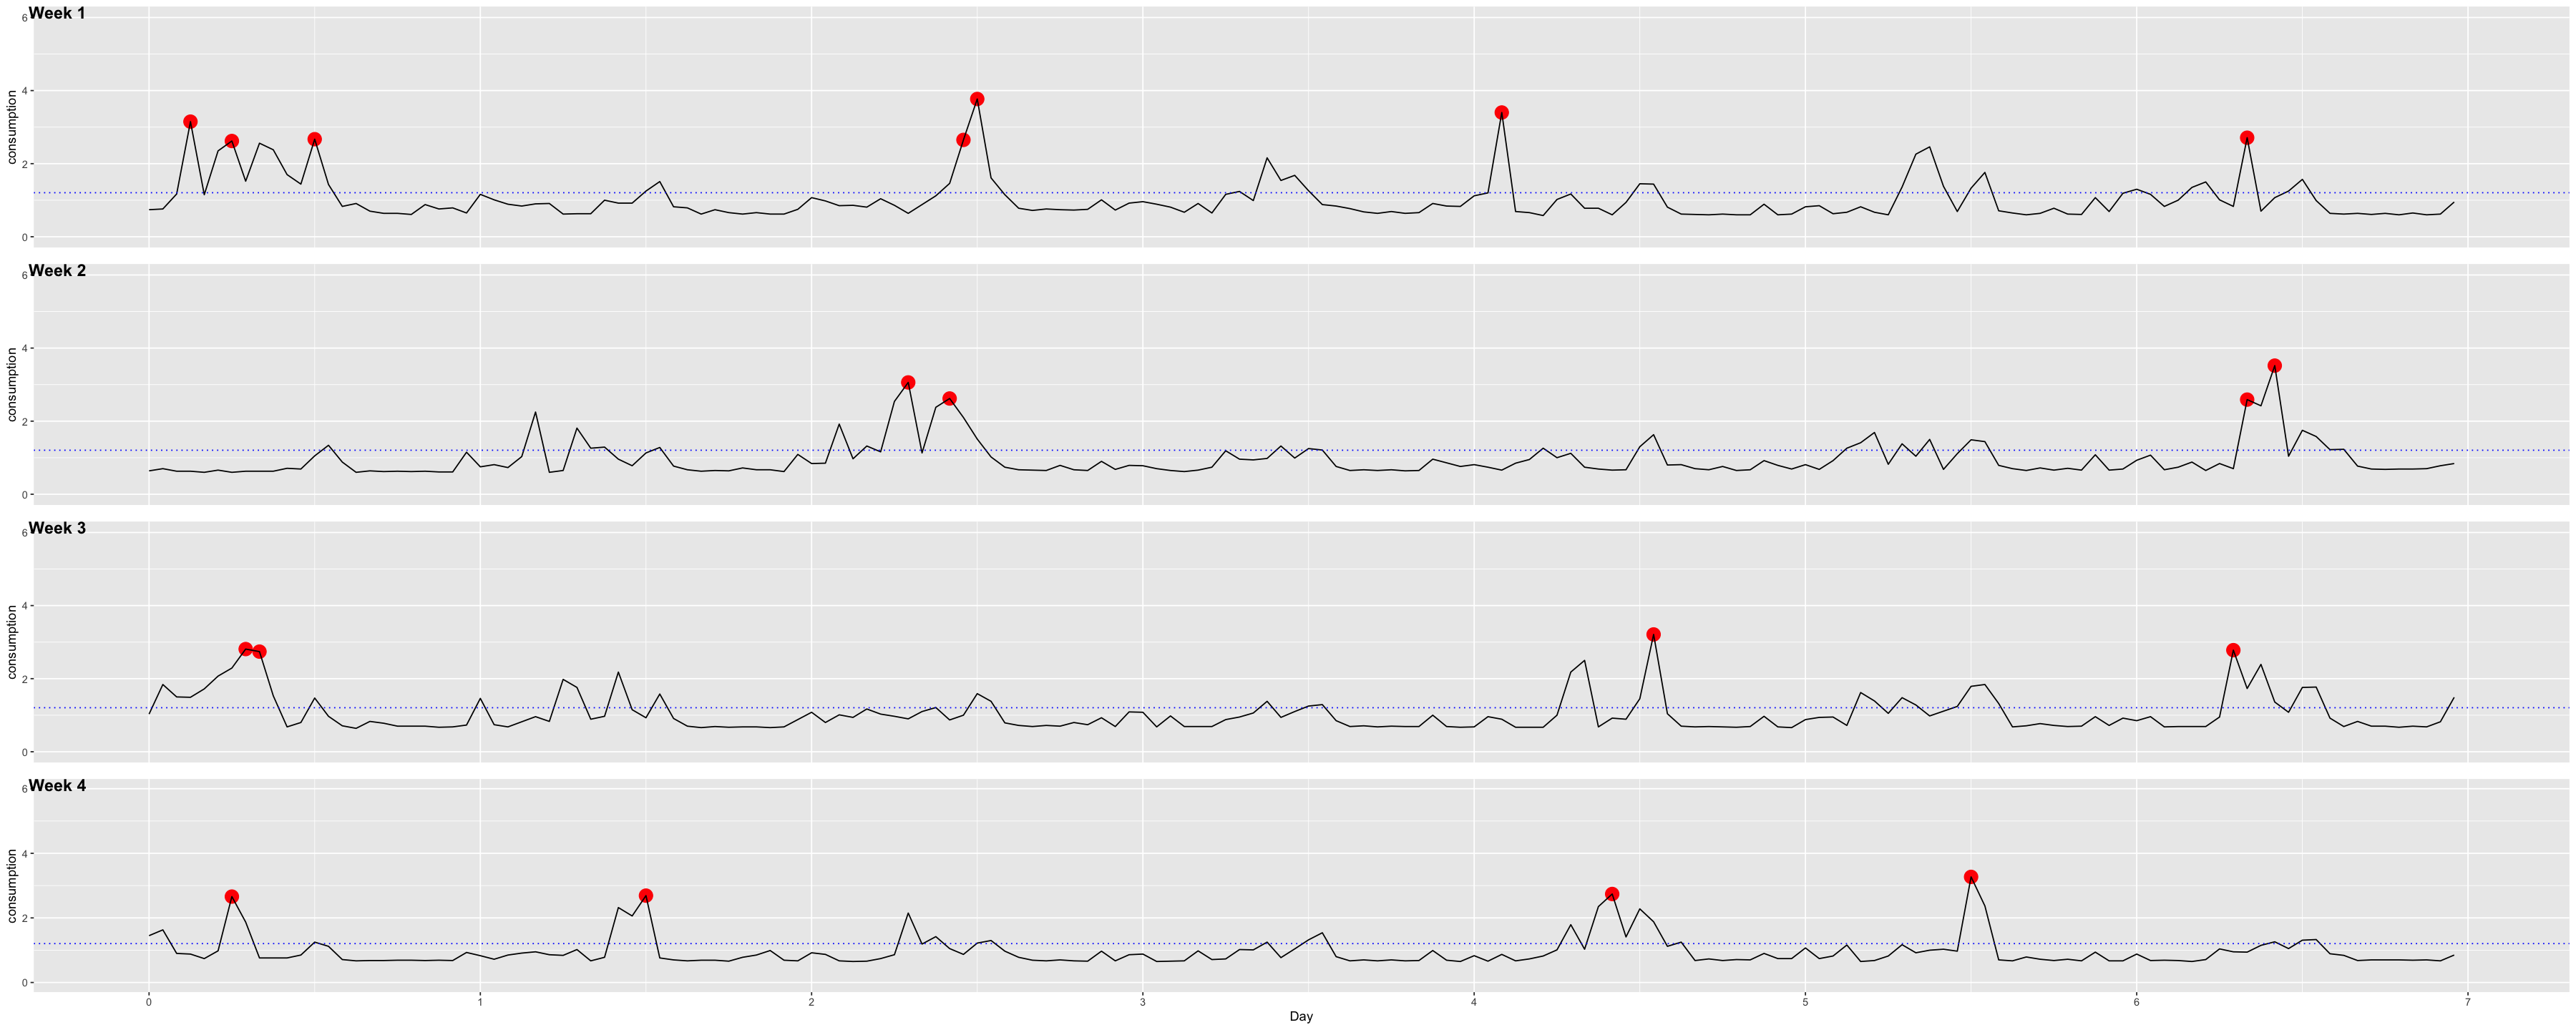

In [179]:
# Visualization of electricity consumption per day and hour
# Set configuration for plot size
options(repr.plot.width = 30, repr.plot.height = 12)

# Outliers characteritics
# Week 1
outliers_size_wk1   <- ifelse(ElecDayHourWeekOneDF$isOutlier == TRUE, 5, 1)
outliers_alpha_wk1  <- ifelse(ElecDayHourWeekOneDF$isOutlier == TRUE, 1, 0)
outliers_color_wk1  <- ifelse(ElecDayHourWeekOneDF$isOutlier == TRUE, "red", "black")
# Week 2
outliers_size_wk2   <- ifelse(ElecDayHourWeekTwoDF$isOutlier == TRUE, 5, 1)
outliers_alpha_wk2  <- ifelse(ElecDayHourWeekTwoDF$isOutlier == TRUE, 1, 0)
outliers_color_wk2  <- ifelse(ElecDayHourWeekTwoDF$isOutlier == TRUE, "red", "black")
# Week 3
outliers_size_wk3   <- ifelse(ElecDayHourWeekThreeDF$isOutlier == TRUE, 5, 1)
outliers_alpha_wk3  <- ifelse(ElecDayHourWeekThreeDF$isOutlier == TRUE, 1, 0)
outliers_color_wk3  <- ifelse(ElecDayHourWeekThreeDF$isOutlier == TRUE, "red", "black")
# Week 4
outliers_size_wk4   <- ifelse(ElecDayHourWeekFourDF$isOutlier == TRUE, 5, 1)
outliers_alpha_wk4  <- ifelse(ElecDayHourWeekFourDF$isOutlier == TRUE, 1, 0)
outliers_color_wk4  <- ifelse(ElecDayHourWeekFourDF$isOutlier == TRUE, "red", "black")  

# Plot definitions
plt_wk1     <- ggplot(ElecDayHourWeekOneDF,    aes(x = instant, y = consumption)) + geom_point(alpha = outliers_alpha_wk1, size = outliers_size_wk1, color = outliers_color_wk1) + geom_line()  + scale_x_continuous(breaks = 0:7, labels = 0:7)
plt_wk2    <- ggplot(ElecDayHourWeekTwoDF,    aes(x = instant, y = consumption)) + geom_point(alpha = outliers_alpha_wk2, size = outliers_size_wk2, color = outliers_color_wk2) + geom_line()  + scale_x_continuous(breaks = 0:7, labels = 0:7)
plt_wk3    <- ggplot(ElecDayHourWeekThreeDF,    aes(x = instant, y = consumption)) + geom_point(alpha = outliers_alpha_wk3, size = outliers_size_wk3, color = outliers_color_wk3) + geom_line()  + scale_x_continuous(breaks = 0:7, labels = 0:7)
plt_wk4    <- ggplot(ElecDayHourWeekFourDF,    aes(x = instant, y = consumption)) + geom_point(alpha = outliers_alpha_wk4, size = outliers_size_wk4, color = outliers_color_wk4) + geom_line()  + scale_x_continuous(breaks = 0:7, labels = 0:7)

# Display plots into a grid
plot_grid(
    plt_wk1 + ylim(0, 6) + geom_hline(yintercept = avg_consumption, color = "blue", linetype = "dotted") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank()), 
    plt_wk2 + ylim(0, 6) + geom_hline(yintercept = avg_consumption, color = "blue", linetype = "dotted") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank()),
    plt_wk3 + ylim(0, 6) + geom_hline(yintercept = avg_consumption, color = "blue", linetype = "dotted") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank()),
    plt_wk4 + ylim(0, 6) + geom_hline(yintercept = avg_consumption, color = "blue", linetype = "dotted") + labs(x = "Day"),
    labels = c("Week 1", "Week 2", "Week 3", "Week 4"),
    ncol = 1, nrow = 4
)

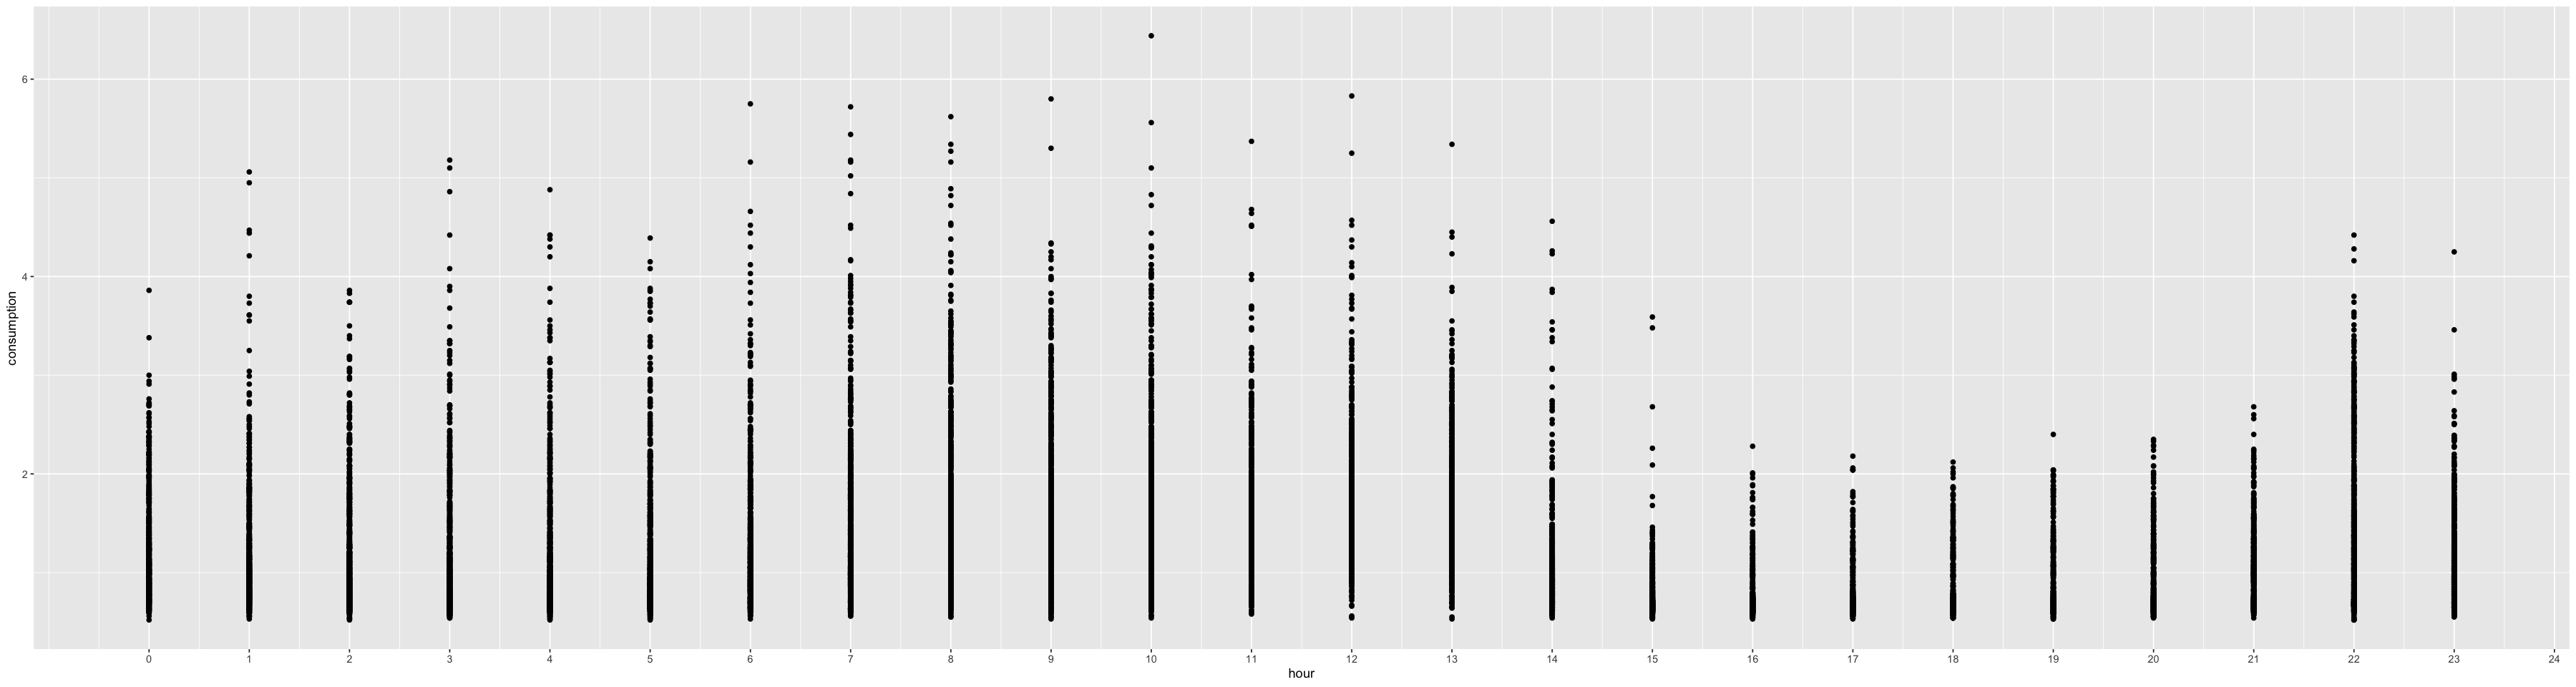

In [184]:
# Set configuration for plot size
options(repr.plot.width = 30, repr.plot.height = 8)
ggplot(ElecHourDF, aes(x = hour, y = consumption)) + geom_point() + scale_x_continuous(breaks = 0:24, labels = 0:24)

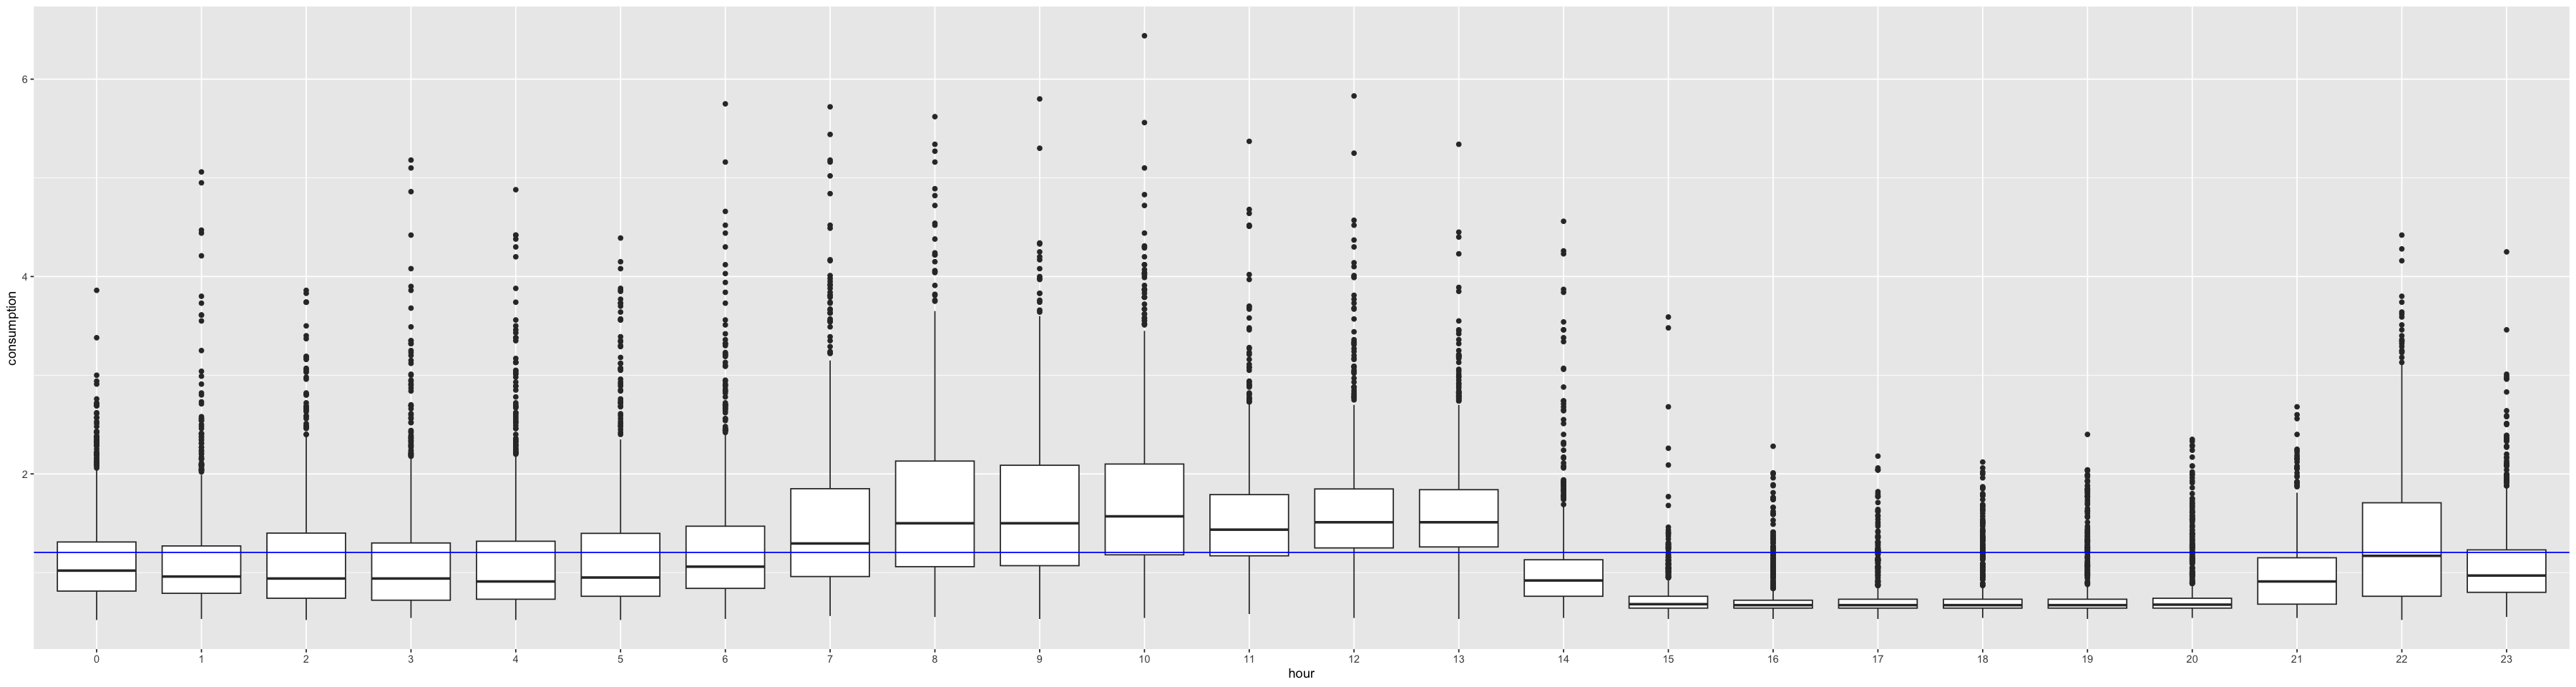

In [183]:
# Set configuration for plot size
options(repr.plot.width = 30, repr.plot.height = 8)
ggplot(ElecHourDF, aes(x = hour, y = consumption)) + geom_boxplot(aes(x = factor(hour))) + geom_hline(yintercept = avg_consumption, color = "blue")